# Exp 3: Image Processing in Frequency Domain and Image Restoration #
## 1.	Aims ##

#### 1. Understand the basic principles of Discrete Fourier Transform, and learn how to perform FFT and IFFT with Python.

#### 2. Be familiar with the image processing methods in the frequency domain, using Python to perform frequency domain filtering.
    
#### 3. Master the basic principles of image restoration, and learn some image restoration algorithms in Python

## 2.	Steps and Requirements

### (1) FFT and IFFT.	
(a) Load the image rhino.jpg, convert it to grayscale.

(b) Perform FFT. Shift the DC component to the center, and show the phase angles and the magnitudes.

(c) Perform IFFT and show the reconstructed image (Tips: remember to shift the DC component back). 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figures.

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale
img = cv2.imread("C:/Users/LuJiaWei/Desktop/images/rhino.jpg", cv2.IMREAD_GRAYSCALE)

# Perform FFT
f_transform = np.fft.fft2(img)

# Shift the DC component to the center
f_transform_shifted = np.fft.fftshift(f_transform)

# Compute magnitude and phase angles
magnitude = np.abs(f_transform_shifted)
phase_angle = np.angle(f_transform_shifted)

# Perform IFFT
reconstructed_image = np.fft.ifft2(np.fft.ifftshift(f_transform_shifted)).real

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Original Image
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')

# Magnitude Spectrum
axs[0, 1].imshow(np.log(1 + magnitude), cmap='gray')
axs[0, 1].set_title('Magnitude Spectrum')

# Phase Spectrum
axs[1, 0].imshow(phase_angle, cmap='gray')
axs[1, 0].set_title('Phase Spectrum')

# Reconstructed Image
axs[1, 1].imshow(reconstructed_image, cmap='gray')
axs[1, 1].set_title('Reconstructed Image')

plt.tight_layout()
plt.show()

### (2) Ideal Lowpass Filtering.	
(a) Load the image rhino.jpg. Convert it to grayscale.

(b) Perform FFT. 

(c) Design an ideal lowpass filter.

(d) Perform frequency domain filtering with the ideal lowpass filter.

(e) Display the original image, the filtered image, the original FFT magnitude, and filtered FFT magnitude in the same figure with sub-figures. Add the corresponding title to the sub-figure. Observe whether there is any ringing artifact in the filtered image. 

In [2]:
# (a) load image and transform into gray image
img = cv2.imread('C:/Users/LuJiaWei/Desktop/images/rhino.jpg', cv2.IMREAD_GRAYSCALE)

# (b) perform FFT
f_transform2 = np.fft.fft2(img)
f_transform2_shifted = np.fft.fftshift(f_transform2)
magnitude_spectrum = 20*np.log(np.abs(f_transform2_shifted))

# (c) Design an ideal lowpass filter
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
d = 30  # 截止频率
mask = np.zeros((rows, cols), np.uint8)
mask[crow-d:crow+d, ccol-d:ccol+d] = 1

# (d) Perform frequency domain filtering with the ideal lowpass filter
f_transform2_shifted_filtered = f_transform2_shifted * mask
f_transform2_filtered = np.fft.ifftshift(f_transform2_shifted_filtered)
filtered_img2 = np.fft.ifft2(f_transform2_filtered).real

# (e) display
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# original image
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')

# filtered image
axs[0, 1].imshow(filtered_img2, cmap='gray')
axs[0, 1].set_title('Filtered Image')

# original FFT magnitude
axs[1, 0].imshow(magnitude_spectrum, cmap='gray')
axs[1, 0].set_title('Original FFT Magnitude')

# filtered FFT magnitude
magnitude_spectrum_filtered = 20*np.log(np.abs(f_transform2_shifted_filtered))
axs[1, 1].imshow(magnitude_spectrum_filtered, cmap='gray')
axs[1, 1].set_title('Filtered FFT Magnitude')

plt.tight_layout()
plt.show()

C:\Users\LuJiaWei\AppData\Local\Temp\ipykernel_15688\3328454392.py:37: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_filtered = 20*np.log(np.abs(f_transform2_shifted_filtered))


### (3) Gaussian Lowpass Filter.	
(a) Load the image lena.jpg. Convert it to grayscale.

(b) Perform FFT.

(c) Perform Gaussian lowpass filtering.

(d) Display the original image, the filtered image, the original FFT magnitude, and filtered FFT magnitude in the same figure with sub-figures. Add the corresponding title to the sub-figure. Observe whether there is any ringing artifact in the filtered image. 

In [3]:
# (a) Load the image and convert it to grayscale
img = cv2.imread('C:/Users/LuJiaWei/Desktop/images/lena.jpg', cv2.IMREAD_GRAYSCALE)

# (b) Perform FFT
f_transform3 = np.fft.fft2(img)
f_transform3_shifted = np.fft.fftshift(f_transform3)
magnitude_spectrum = 20*np.log(np.abs(f_transform3_shifted))

# (c) Perform Gaussian lowpass filtering
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
d = 30  # cutoff frequency
sigma = 10  # standard deviation
x = np.linspace(-ccol, ccol, cols)
y = np.linspace(-crow, crow, rows)
X, Y = np.meshgrid(x, y)
gaussian_mask = np.exp(-(X**2 + Y**2) / (2*sigma**2))
# Apply the Gaussian mask to the frequency domain
f_transform3_shifted_filtered = f_transform3_shifted * gaussian_mask
# Inverse shift
f_transform3_filtered = np.fft.ifftshift(f_transform3_shifted_filtered)
# Inverse FFT
filtered_img3 = np.fft.ifft2(f_transform3_filtered).real

# (d) Display
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# Original Image
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')
# Filtered Image
axs[0, 1].imshow(filtered_img3, cmap='gray')
axs[0, 1].set_title('Filtered Image')
# Original FFT Magnitude
axs[1, 0].imshow(magnitude_spectrum, cmap='gray')
axs[1, 0].set_title('Original FFT Magnitude')
# Filtered FFT Magnitude
magnitude_spectrum_filtered = 20*np.log(np.abs(f_transform3_shifted_filtered))
axs[1, 1].imshow(magnitude_spectrum_filtered, cmap='gray')
axs[1, 1].set_title('Filtered FFT Magnitude')
plt.tight_layout()
plt.show()

### (4) Butterworth Lowpass Filter.	
(a) Load the RGB image lena.jpg.

(b) Perform FFT. (Note that when using color images, pay attention to the parameter <font style="color:red;">axes</font> of functions such as fft, ifft, fftshift and ifftshift)

(c) Design three Butterworth lowpass filters with different cutoff frequencies $D_0$ and orders $n$ (cut-off frequency $D_0$ and order $n$ are free to choose).

(d) Perform frequency domain filtering with the designed Butterworth lowpass filters.

(e) Obtain filtered images with IFFT.

(f) Display the original image and the filtered images in the same figure with sub-figures. Observe their differences. Add the corresponding title to the sub-figures.


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# (a) Load the RGB image
img = cv2.imread('C:/Users/LuJiaWei/Desktop/images/lena.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols, _ = img_rgb.shape
crow, ccol = rows // 2, cols // 2

# (c) Butterworth filter design
def butterworth_lowpass(shape, D0, n):
    rows, cols = shape
    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - rows // 2) ** 2 + (V - cols // 2) ** 2)
    H = 1 / (1 + (D / D0) ** (2 * n))
    return H

# (d, e) Apply filtering per channel
def apply_butterworth_filter(img_rgb, D0, n):
    filtered_channels = []
    for i in range(3):  # For R, G, B
        f = np.fft.fft2(img_rgb[:, :, i])
        fshift = np.fft.fftshift(f)
        H = butterworth_lowpass((rows, cols), D0, n)
        fshift_filtered = fshift * H
        f_ishift = np.fft.ifftshift(fshift_filtered)
        img_filtered = np.fft.ifft2(f_ishift)
        filtered_channels.append(np.abs(img_filtered))
    # Stack channels back to an RGB image
    filtered_img = np.stack(filtered_channels, axis=-1).astype(np.uint8)
    return filtered_img

# Define three sets of (D0, n)
params = [
    (20, 1),   # very soft lowpass
    (50, 2),   # moderate smoothing
    (80, 5)    # sharper cutoff
]

filtered_images = [apply_butterworth_filter(img_rgb, D0, n) for D0, n in params]

# (f) Display results
titles = [
    'Original Image',
    'Butterworth LPF (D0=20, n=1)',
    'Butterworth LPF (D0=50, n=2)',
    'Butterworth LPF (D0=80, n=5)'
]
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title(titles[0])
plt.axis('off')

for i in range(3):
    plt.subplot(2, 2, i+2)
    plt.imshow(filtered_images[i])
    plt.title(titles[i+1])
    plt.axis('off')

plt.tight_layout()
plt.show()


### (5) Butterworth Highpass Filter.	
(a) Load the RGB image lena.jpg.

(b) Perform FFT. (Note that when using color images, pay attention to the parameter <font style="color:red;">axes</font> of functions such as fft, ifft, fftshift and ifftshift)

(c) Design three Butterworth highpass filters with different cutoff frequencies $D_0$ and orders $n$ (cut-off frequency $D_0$ and order $n$  are free to choose).

(d) Perform frequency domain filtering with the designed Butterworth highpass filters.

(e) Obtain filtered images with IFFT.

(f) Display the original image and the filtered images in the same figure with sub-figures. Observe their differences. Add the corresponding title to the sub-figures.

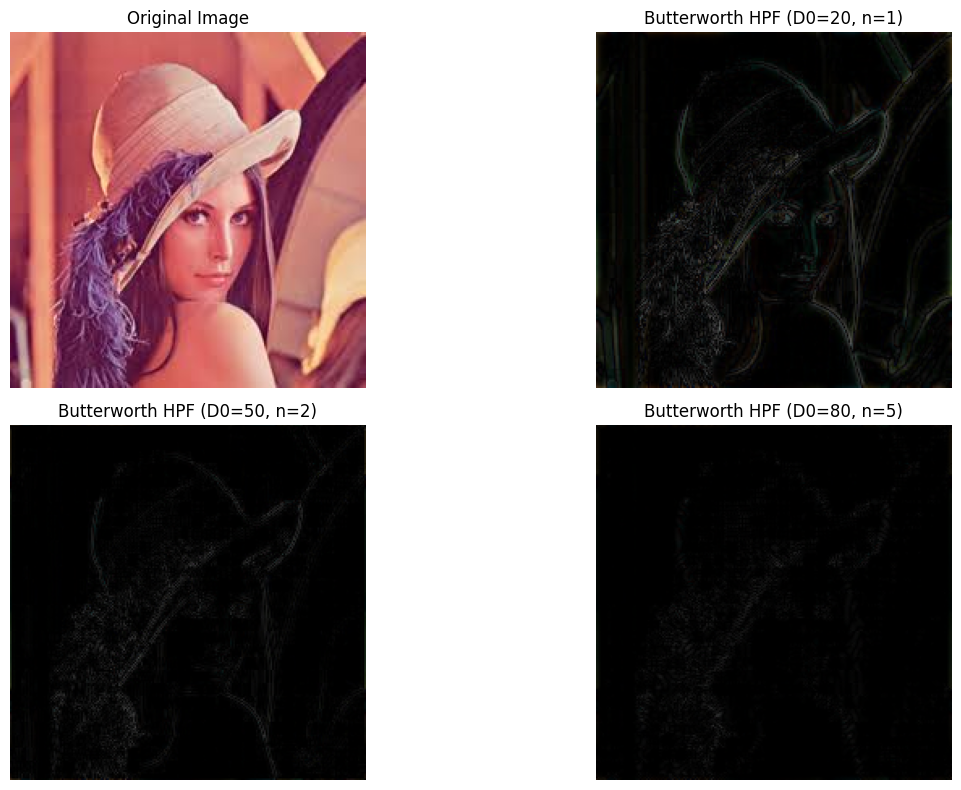

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# (a) Load RGB image
img = cv2.imread('C:/Users/LuJiaWei/Desktop/images/lena.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols, _ = img_rgb.shape
crow, ccol = rows // 2, cols // 2

# (c) Butterworth Highpass filter design
def butterworth_highpass(shape, D0, n):
    rows, cols = shape
    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - rows // 2) ** 2 + (V - cols // 2) ** 2)
    H = 1 / (1 + (D0 / (D + 1e-5)) ** (2 * n))  # Add epsilon to avoid division by zero
    return H

# (d, e) Apply highpass filter per channel
def apply_butterworth_highpass(img_rgb, D0, n):
    filtered_channels = []
    for i in range(3):  # For R, G, B channels
        f = np.fft.fft2(img_rgb[:, :, i])
        fshift = np.fft.fftshift(f)
        H = butterworth_highpass((rows, cols), D0, n)
        fshift_filtered = fshift * H
        f_ishift = np.fft.ifftshift(fshift_filtered)
        img_filtered = np.fft.ifft2(f_ishift)
        filtered_channels.append(np.abs(img_filtered))
    filtered_img = np.stack(filtered_channels, axis=-1).astype(np.uint8)
    return filtered_img

# Filter parameters: (D0, n)
params = [
    (20, 1),   # stronger highpass, may emphasize edges/noise
    (50, 2),   # moderate enhancement
    (80, 5)    # smoother result with less noise
]

filtered_images = [apply_butterworth_highpass(img_rgb, D0, n) for D0, n in params]

# (f) Display original and filtered images
titles = [
    'Original Image',
    'Butterworth HPF (D0=20, n=1)',
    'Butterworth HPF (D0=50, n=2)',
    'Butterworth HPF (D0=80, n=5)'
]

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title(titles[0])
plt.axis('off')

for i in range(3):
    plt.subplot(2, 2, i + 2)
    plt.imshow(filtered_images[i])
    plt.title(titles[i + 1])
    plt.axis('off')

plt.tight_layout()
plt.show()


### (6) Motion Blur, Inverse filtering and Wiener filtering.	
(a) Load the RGB image lena.jpg.

(b) Apply motion blur to it.

(c) Recovering images by using inverse filtering and Wiener filtering, respectively. (Note that when using color images, pay attention to the <font style="color:red;">axes</font> parameters of functions such as fft, ifft, fftshift and ifftshift)

(d) Add noise to the blurred image, and then use Inverse filtering and Wiener filtering to recovere the image, respectively.

(e) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figures.

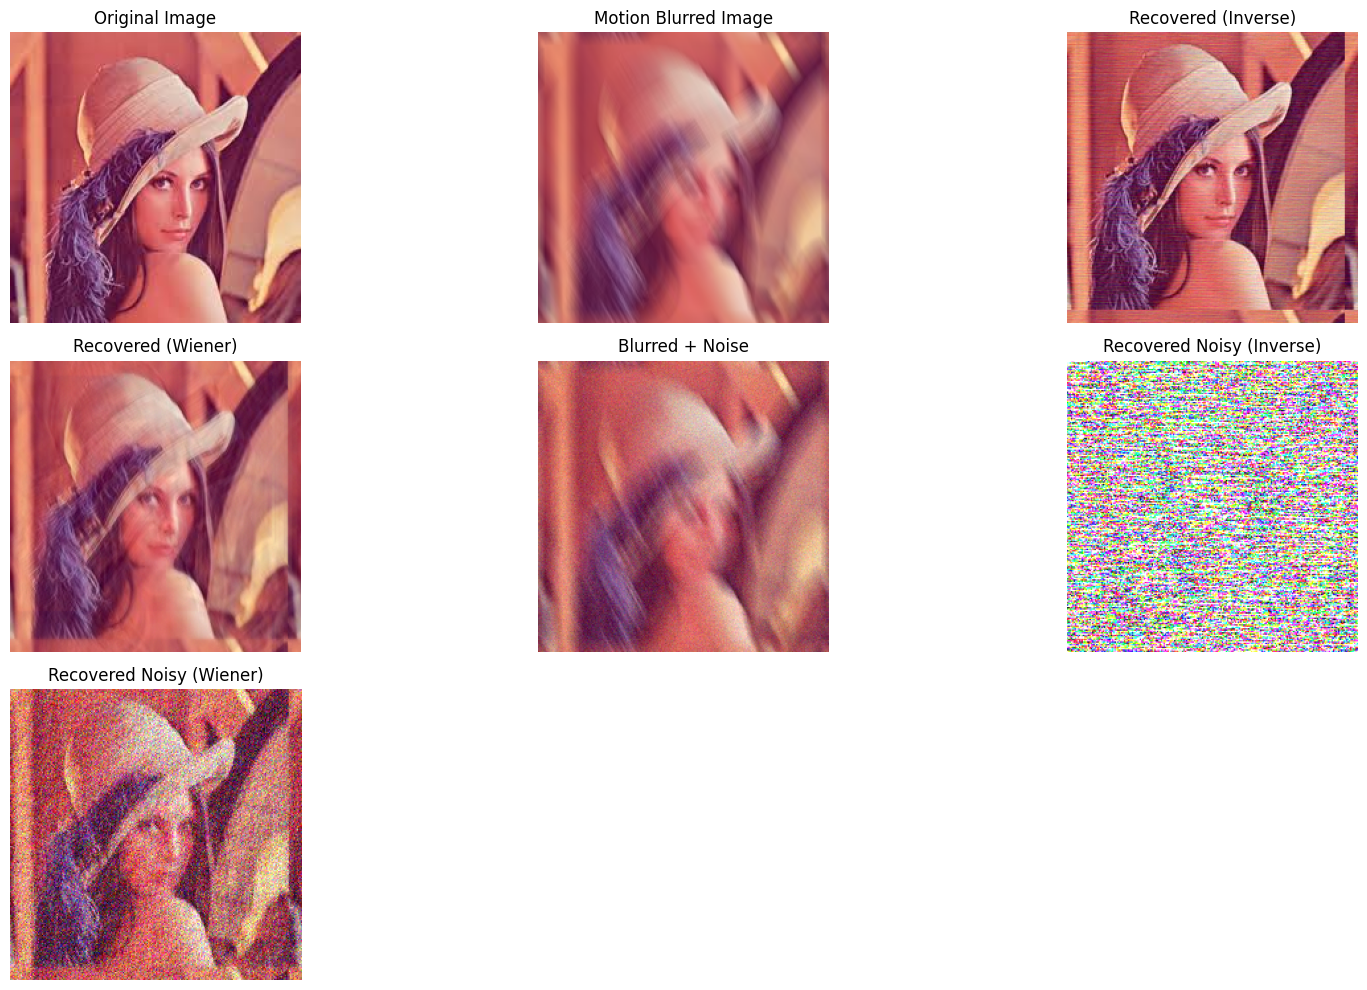

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# (a) Load image
img = cv2.imread('C:/Users/LuJiaWei/Desktop/images/lena.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols, _ = img_rgb.shape

# (b) Motion blur PSF (Point Spread Function)
def motion_blur_psf(size, angle):
    psf = np.zeros((size, size))
    center = size // 2
    tan_theta = np.tan(np.deg2rad(angle))
    for i in range(size):
        offset = int(center + (i - center) * tan_theta)
        if 0 <= offset < size:
            psf[i, offset] = 1
    psf /= psf.sum()
    return psf

psf_size = 21
psf_angle = 30
psf = motion_blur_psf(psf_size, psf_angle)

# Helper: apply PSF (convolve each color channel)
def apply_motion_blur(image, psf):
    blurred = np.zeros_like(image)
    for i in range(3):
        blurred[:, :, i] = convolve2d(image[:, :, i], psf, mode='same', boundary='wrap')
    return blurred

blurred = apply_motion_blur(img_rgb, psf)

# (c) Inverse & Wiener filters
def fft_filter(img, H, method='inverse', K=0.01):
    recovered = np.zeros_like(img, dtype='float')
    for i in range(3):
        F = np.fft.fft2(img[:, :, i])
        Fshift = np.fft.fftshift(F)
        H_fft = np.fft.fft2(psf, s=(rows, cols))
        H_fft_shifted = np.fft.fftshift(H_fft)

        if method == 'inverse':
            H_inv = np.where(np.abs(H_fft_shifted) > 1e-5, 1 / H_fft_shifted, 0)
            G = Fshift * H_inv
        elif method == 'wiener':
            H_conj = np.conj(H_fft_shifted)
            G = Fshift * H_conj / (np.abs(H_fft_shifted)**2 + K)

        G_ishift = np.fft.ifftshift(G)
        recovered[:, :, i] = np.abs(np.fft.ifft2(G_ishift))
    return np.clip(recovered, 0, 255).astype(np.uint8)

recovered_inverse = fft_filter(blurred, psf, method='inverse')
recovered_wiener = fft_filter(blurred, psf, method='wiener')

# (d) Add noise and recover
noise_std = 10
noise = np.random.normal(0, noise_std, blurred.shape)
blurred_noisy = np.clip(blurred + noise, 0, 255).astype(np.uint8)

recovered_inverse_noisy = fft_filter(blurred_noisy, psf, method='inverse')
recovered_wiener_noisy = fft_filter(blurred_noisy, psf, method='wiener')

# (e) Display results
titles = [
    'Original Image',
    'Motion Blurred Image',
    'Recovered (Inverse)',
    'Recovered (Wiener)',
    'Blurred + Noise',
    'Recovered Noisy (Inverse)',
    'Recovered Noisy (Wiener)'
]

images = [
    img_rgb, blurred,
    recovered_inverse, recovered_wiener,
    blurred_noisy,
    recovered_inverse_noisy, recovered_wiener_noisy
]

plt.figure(figsize=(16, 10))
for i in range(len(images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


### (7) Homomorphic Filtering  (Bonus Task)
(a) Load the RGB image forest.jpg.

(b) Write a function to enhance a color image with homomorphic filtering to each of its color channels.

(c) Display the original image and the filtered image in the same figure with sub-figures. Add the corresponding title to the sub-figures.

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# (a) Load the RGB image
img = cv2.imread('C:/Users/LuJiaWei/Desktop/images/forest.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

# (b) a function of Homomorphic Filtering
def homomorphic_filtering(image, gamma_l=0.5, gamma_h=2.0, c=1.0):
    # convert to float32 
    image_float = np.float32(image) / 255.0
    
    # convert to log
    log_image = np.log1p(image_float)
    
    # perform Fourier transform
    f_transform = np.fft.fft2(log_image)
    f_transform_shifted = np.fft.fftshift(f_transform)
    
    # Homomorphic Filtering
    rows, cols, channels = image.shape
    crow, ccol = rows // 2, cols // 2
    Y, X = np.ogrid[:rows, :cols]
    distance = np.sqrt((X - crow) ** 2 + (Y - ccol) ** 2)
    H = (gamma_h - gamma_l) * (1 - np.exp(-c * (distance ** 2))) + gamma_l
    
    # apply Homomorphic Filtering
    filtered_transform = f_transform_shifted * H[..., np.newaxis]
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_transform)).real
    
    # exponentiation restores the image to its original domain
    filtered_image_exp = np.expm1(filtered_image)
    
    # scale to the range [0, 255]
    filtered_image_scaled = np.uint8(255 * filtered_image_exp / np.max(filtered_image_exp))
    
    return filtered_image_scaled

# (c) apply homomorphic filtering to each color channel
filtered_img7 = homomorphic_filtering(img)

# (d) display
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# original image
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('original image ')
# filtered image
axs[1].imshow(cv2.cvtColor(filtered_img7, cv2.COLOR_BGR2RGB))
axs[1].set_title('filtered image')
plt.tight_layout()
plt.show()


## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.